# The World in Words: Making a Word Cloud out of The New York Times Homepage

Using words to visualize what's happening in the world today, Friday, April 11, 2025.

And now...

All the news that's fit to code.

## Step 1: Scrape the NYT

In [5]:
import requests

In [13]:
url = 'https://www.nytimes.com/'
page = requests.get(url)
text = page.text
text
page.close()

#### Time for Beautiful Soup.

In [24]:
# Add another import to clean up the above output
# This is called Beautiful Soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [27]:
# Check the cleaned up output
soup

<!DOCTYPE html>

<html class="nytapp-vi-homepage" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">The New York Times - Breaking News, US News, World News and Videos</title>
<meta content="Live news, investigations, opinion, photos and video by the journalists of The New York Times from more than 150 countries around the world. Subscribe for coverage of U.S. and international news, politics, business, technology, science, health, arts, sports and more." data-rh="true" name="description"/><meta content="https://www.nytimes.com" data-rh="true" property="og:url"/><meta content="website" data-rh="true" property="og:type"/><meta content="The New York Times - Breaking News, US News, World News and Videos" data-rh="true" property="og:title"/><meta content="Live news, investigations, opinion, photos and video by the journalists of The New York Times from more than 150 countries around the world. Subscribe for coverage of U.S. and i

## Step 2: View the text from the NYT homepage all at once

In [30]:
# Use .get_text() to get all the text at once
# Note: This is note super clean
soup.get_text()

"\n\n\n\nThe New York Times - Breaking News, US News, World News and Videos\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentSkip to site indexSKIP ADVERTISEMENTU.S.InternationalCanadaEspañol中文\xa0Today’s PaperU.S.SectionsU.S.PoliticsNew YorkCaliforniaEducationHealthObituariesScienceClimateWeatherSportsBusinessTechThe UpshotThe MagazineTop StoriesTrump TransitionSupreme CourtCongressImmigrationAbortionNewslettersThe MorningMake sense of the day’s news and ideas.The UpshotAnalysis that explains politics, policy and everyday life.See all newslettersPodcastsThe DailyThe biggest stories of our time, in 20 minutes a day.See all podcastsWorldSectionsWorldAfricaAmericasAsiaAustraliaCanadaEuropeMiddle EastScienceClimateWeatherHealthObituariesTop StoriesMiddle East CrisisRussia-Ukraine WarChina International RelationsThe Global ProfileLeer en EspañolNewslettersMorning Briefing: EuropeGet what you need to know to start your day.The InterpreterOriginal analysis on the week’s bi

## Step 3: Tokeize the text, remove the stop words and lemmatize

This is all about breaking down the scaped NYT text into individual words or **tokens** that can be clened, counted and visualized in the word cloud.

In [39]:
# Save 'soup.get_text()' as a variable
nyt_text = soup.get_text()

In [47]:
# Confirm the varibale saved but just display the first 1000 characters
nyt_text[:1000]

'\n\n\n\nThe New York Times - Breaking News, US News, World News and Videos\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentSkip to site indexSKIP ADVERTISEMENTU.S.InternationalCanadaEspañol中文\xa0Today’s PaperU.S.SectionsU.S.PoliticsNew YorkCaliforniaEducationHealthObituariesScienceClimateWeatherSportsBusinessTechThe UpshotThe MagazineTop StoriesTrump TransitionSupreme CourtCongressImmigrationAbortionNewslettersThe MorningMake sense of the day’s news and ideas.The UpshotAnalysis that explains politics, policy and everyday life.See all newslettersPodcastsThe DailyThe biggest stories of our time, in 20 minutes a day.See all podcastsWorldSectionsWorldAfricaAmericasAsiaAustraliaCanadaEuropeMiddle EastScienceClimateWeatherHealthObituariesTop StoriesMiddle East CrisisRussia-Ukraine WarChina International RelationsThe Global ProfileLeer en EspañolNewslettersMorning Briefing: EuropeGet what you need to know to start your day.The InterpreterOriginal analysis on the week’s bi

In [52]:
# Import tokenize from gensim
from gensim.utils import tokenize

In [54]:
# Now tokenize 'nyt_text'
tokenize(nyt_text)

<generator object simple_tokenize at 0x1303a4450>

In [58]:
# Turn tokenize into a list
list(tokenize(nyt_text))

['The',
 'New',
 'York',
 'Times',
 'Breaking',
 'News',
 'US',
 'News',
 'World',
 'News',
 'and',
 'Videos',
 'Skip',
 'to',
 'contentSkip',
 'to',
 'site',
 'indexSKIP',
 'ADVERTISEMENTU',
 'S',
 'InternationalCanadaEspañol中文',
 'Today',
 's',
 'PaperU',
 'S',
 'SectionsU',
 'S',
 'PoliticsNew',
 'YorkCaliforniaEducationHealthObituariesScienceClimateWeatherSportsBusinessTechThe',
 'UpshotThe',
 'MagazineTop',
 'StoriesTrump',
 'TransitionSupreme',
 'CourtCongressImmigrationAbortionNewslettersThe',
 'MorningMake',
 'sense',
 'of',
 'the',
 'day',
 's',
 'news',
 'and',
 'ideas',
 'The',
 'UpshotAnalysis',
 'that',
 'explains',
 'politics',
 'policy',
 'and',
 'everyday',
 'life',
 'See',
 'all',
 'newslettersPodcastsThe',
 'DailyThe',
 'biggest',
 'stories',
 'of',
 'our',
 'time',
 'in',
 'minutes',
 'a',
 'day',
 'See',
 'all',
 'podcastsWorldSectionsWorldAfricaAmericasAsiaAustraliaCanadaEuropeMiddle',
 'EastScienceClimateWeatherHealthObituariesTop',
 'StoriesMiddle',
 'East',
 'Cr

In [70]:
# Use regex to clean up that mess
fixed_nyt_text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', nyt_text)
fixed_nyt_text[:1000]

'Sections  Top Stories Newsletters Make sense of the day’s news and ideas. Analysis that explains politics, policy and everyday life. Podcasts The biggest stories of our time, in 20 minutes a day. Sections Top Stories Newsletters Get what you need to know to start your day. Original analysis on the week’s biggest global stories.  The latest news for any part of the world you select. Backstories and analysis from our Canadian correspondents. Sections  Top Stories Newsletters The most crucial business and policy news you need to know. Podcasts Our tech journalists help you make sense of the rapidly changing tech world. Sections  Recommendations Newsletters Book recommendations from our critics. Streaming TV and movie recommendations. Podcasts The podcast that takes you inside the literary world. Pop music news, new songs and albums, and artists of note. Sections  Columns Newsletters The latest news on what we wear, by our chief fashion critic. Essential news and guidance to live your hea

In [74]:
# Tokenize the updated text
tokenize(fixed_nyt_text)

<generator object simple_tokenize at 0x1303a4520>

In [76]:
# Check the first 1000 characters
fixed_nyt_text[:1000]

'Sections  Top Stories Newsletters Make sense of the day’s news and ideas. Analysis that explains politics, policy and everyday life. Podcasts The biggest stories of our time, in 20 minutes a day. Sections Top Stories Newsletters Get what you need to know to start your day. Original analysis on the week’s biggest global stories.  The latest news for any part of the world you select. Backstories and analysis from our Canadian correspondents. Sections  Top Stories Newsletters The most crucial business and policy news you need to know. Podcasts Our tech journalists help you make sense of the rapidly changing tech world. Sections  Recommendations Newsletters Book recommendations from our critics. Streaming TV and movie recommendations. Podcasts The podcast that takes you inside the literary world. Pop music news, new songs and albums, and artists of note. Sections  Columns Newsletters The latest news on what we wear, by our chief fashion critic. Essential news and guidance to live your hea

In [88]:
# Turn 'fixed_nyt_text' into a list and save it as 'tokens'
tokens = list(tokenize(fixed_nyt_text))
tokens

['Sections',
 'Top',
 'Stories',
 'Newsletters',
 'Make',
 'sense',
 'of',
 'the',
 'day',
 's',
 'news',
 'and',
 'ideas',
 'Analysis',
 'that',
 'explains',
 'politics',
 'policy',
 'and',
 'everyday',
 'life',
 'Podcasts',
 'The',
 'biggest',
 'stories',
 'of',
 'our',
 'time',
 'in',
 'minutes',
 'a',
 'day',
 'Sections',
 'Top',
 'Stories',
 'Newsletters',
 'Get',
 'what',
 'you',
 'need',
 'to',
 'know',
 'to',
 'start',
 'your',
 'day',
 'Original',
 'analysis',
 'on',
 'the',
 'week',
 's',
 'biggest',
 'global',
 'stories',
 'The',
 'latest',
 'news',
 'for',
 'any',
 'part',
 'of',
 'the',
 'world',
 'you',
 'select',
 'Backstories',
 'and',
 'analysis',
 'from',
 'our',
 'Canadian',
 'correspondents',
 'Sections',
 'Top',
 'Stories',
 'Newsletters',
 'The',
 'most',
 'crucial',
 'business',
 'and',
 'policy',
 'news',
 'you',
 'need',
 'to',
 'know',
 'Podcasts',
 'Our',
 'tech',
 'journalists',
 'help',
 'you',
 'make',
 'sense',
 'of',
 'the',
 'rapidly',
 'changing',
 'te

In [90]:
# Make it all lowercase with list comprehension
tokens = [t.lower() for t in tokens]

In [94]:
# Confirm the lowercase
tokens[:10]

['sections',
 'top',
 'stories',
 'newsletters',
 'make',
 'sense',
 'of',
 'the',
 'day',
 's']

### Time to remove the stop words

**Stop words** are words like "a", "and" *and* "the."

In [101]:
# Remove the stop words
# So, import the following
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karlbuscheck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Check the set of stop words
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [105]:
# Check the length
len(stop)

198

In [107]:
# Use list comprehension to remove the stop words and save as nyt_text_nostop
nyt_text_nostop = [w for w in tokens if w not in stop]
nyt_text_nostop

['sections',
 'top',
 'stories',
 'newsletters',
 'make',
 'sense',
 'day',
 'news',
 'ideas',
 'analysis',
 'explains',
 'politics',
 'policy',
 'everyday',
 'life',
 'podcasts',
 'biggest',
 'stories',
 'time',
 'minutes',
 'day',
 'sections',
 'top',
 'stories',
 'newsletters',
 'get',
 'need',
 'know',
 'start',
 'day',
 'original',
 'analysis',
 'week',
 'biggest',
 'global',
 'stories',
 'latest',
 'news',
 'part',
 'world',
 'select',
 'backstories',
 'analysis',
 'canadian',
 'correspondents',
 'sections',
 'top',
 'stories',
 'newsletters',
 'crucial',
 'business',
 'policy',
 'news',
 'need',
 'know',
 'podcasts',
 'tech',
 'journalists',
 'help',
 'make',
 'sense',
 'rapidly',
 'changing',
 'tech',
 'world',
 'sections',
 'recommendations',
 'newsletters',
 'book',
 'recommendations',
 'critics',
 'streaming',
 'tv',
 'movie',
 'recommendations',
 'podcasts',
 'podcast',
 'takes',
 'inside',
 'literary',
 'world',
 'pop',
 'music',
 'news',
 'new',
 'songs',
 'albums',
 'art

In [109]:
# Check the length of the updated list
len(nyt_text_nostop)

1237

In [111]:
# Compare with the length of the previous list
len(tokens)

1840

In [114]:
# So, how many words were dropped...
len(tokens) - len(nyt_text_nostop)

603

#### Lemmatize the text

Lemmatization is all about grouping together different forms of the same word. This will make sure the word cloud reflects the big ideas -- not grammatical variations.

In [135]:
# Start with the imports
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karlbuscheck/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [141]:
# For reference, lemmatize political
wordnet_lemmatizer.lemmatize('university')

'university'

In [143]:
# Now try universities
wordnet_lemmatizer.lemmatize('universities')

'university'

In [145]:
# Grab the 'nyt_text_nostop' list and use list comprehension to create a new list
# using the wordnet_lemmatizer.lemmatize() method from above
# And save it as 'nyt_text_lemmatized'
nyt_text_lemmatized = [wordnet_lemmatizer.lemmatize(w) for w in nyt_text_nostop]
nyt_text_lemmatized

['section',
 'top',
 'story',
 'newsletter',
 'make',
 'sense',
 'day',
 'news',
 'idea',
 'analysis',
 'explains',
 'politics',
 'policy',
 'everyday',
 'life',
 'podcasts',
 'biggest',
 'story',
 'time',
 'minute',
 'day',
 'section',
 'top',
 'story',
 'newsletter',
 'get',
 'need',
 'know',
 'start',
 'day',
 'original',
 'analysis',
 'week',
 'biggest',
 'global',
 'story',
 'latest',
 'news',
 'part',
 'world',
 'select',
 'backstories',
 'analysis',
 'canadian',
 'correspondent',
 'section',
 'top',
 'story',
 'newsletter',
 'crucial',
 'business',
 'policy',
 'news',
 'need',
 'know',
 'podcasts',
 'tech',
 'journalist',
 'help',
 'make',
 'sense',
 'rapidly',
 'changing',
 'tech',
 'world',
 'section',
 'recommendation',
 'newsletter',
 'book',
 'recommendation',
 'critic',
 'streaming',
 'tv',
 'movie',
 'recommendation',
 'podcasts',
 'podcast',
 'take',
 'inside',
 'literary',
 'world',
 'pop',
 'music',
 'news',
 'new',
 'song',
 'album',
 'artist',
 'note',
 'section',
 '

In [147]:
# Worth noting: The length of the list stays the same because 
# lemmatizer doesn't drop duplicates, it just standardizes them
len(nyt_text_lemmatized)

1237

## Step 4: Create the word cloud

In [154]:
# First the import FreqDist
from nltk import FreqDist
freqDist = FreqDist(nyt_text_lemmatized)
freqDist

FreqDist({'read': 27, 'min': 26, 'story': 21, 'newsletter': 20, 'news': 17, 'top': 16, 'new': 15, 'podcasts': 13, 'section': 12, 'time': 11, ...})

In [156]:
# Now import matplotlib and wordcloud
from matplotlib import pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [175]:
# And create the word cloud...
# First, define the function so as not to have to copy the code over and over
def make_word_cloud(words):
    wordc = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(FreqDist(words))
    # Open a plot of the generated image.

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordc)
    plt.axis("off")

    # Save
    #plt.savefig('wordcloud.png',dpi=600, facecolor='k', bbox_inches='tight')
    plt.tight_layout(pad=0)

    # Show
    plt.show()

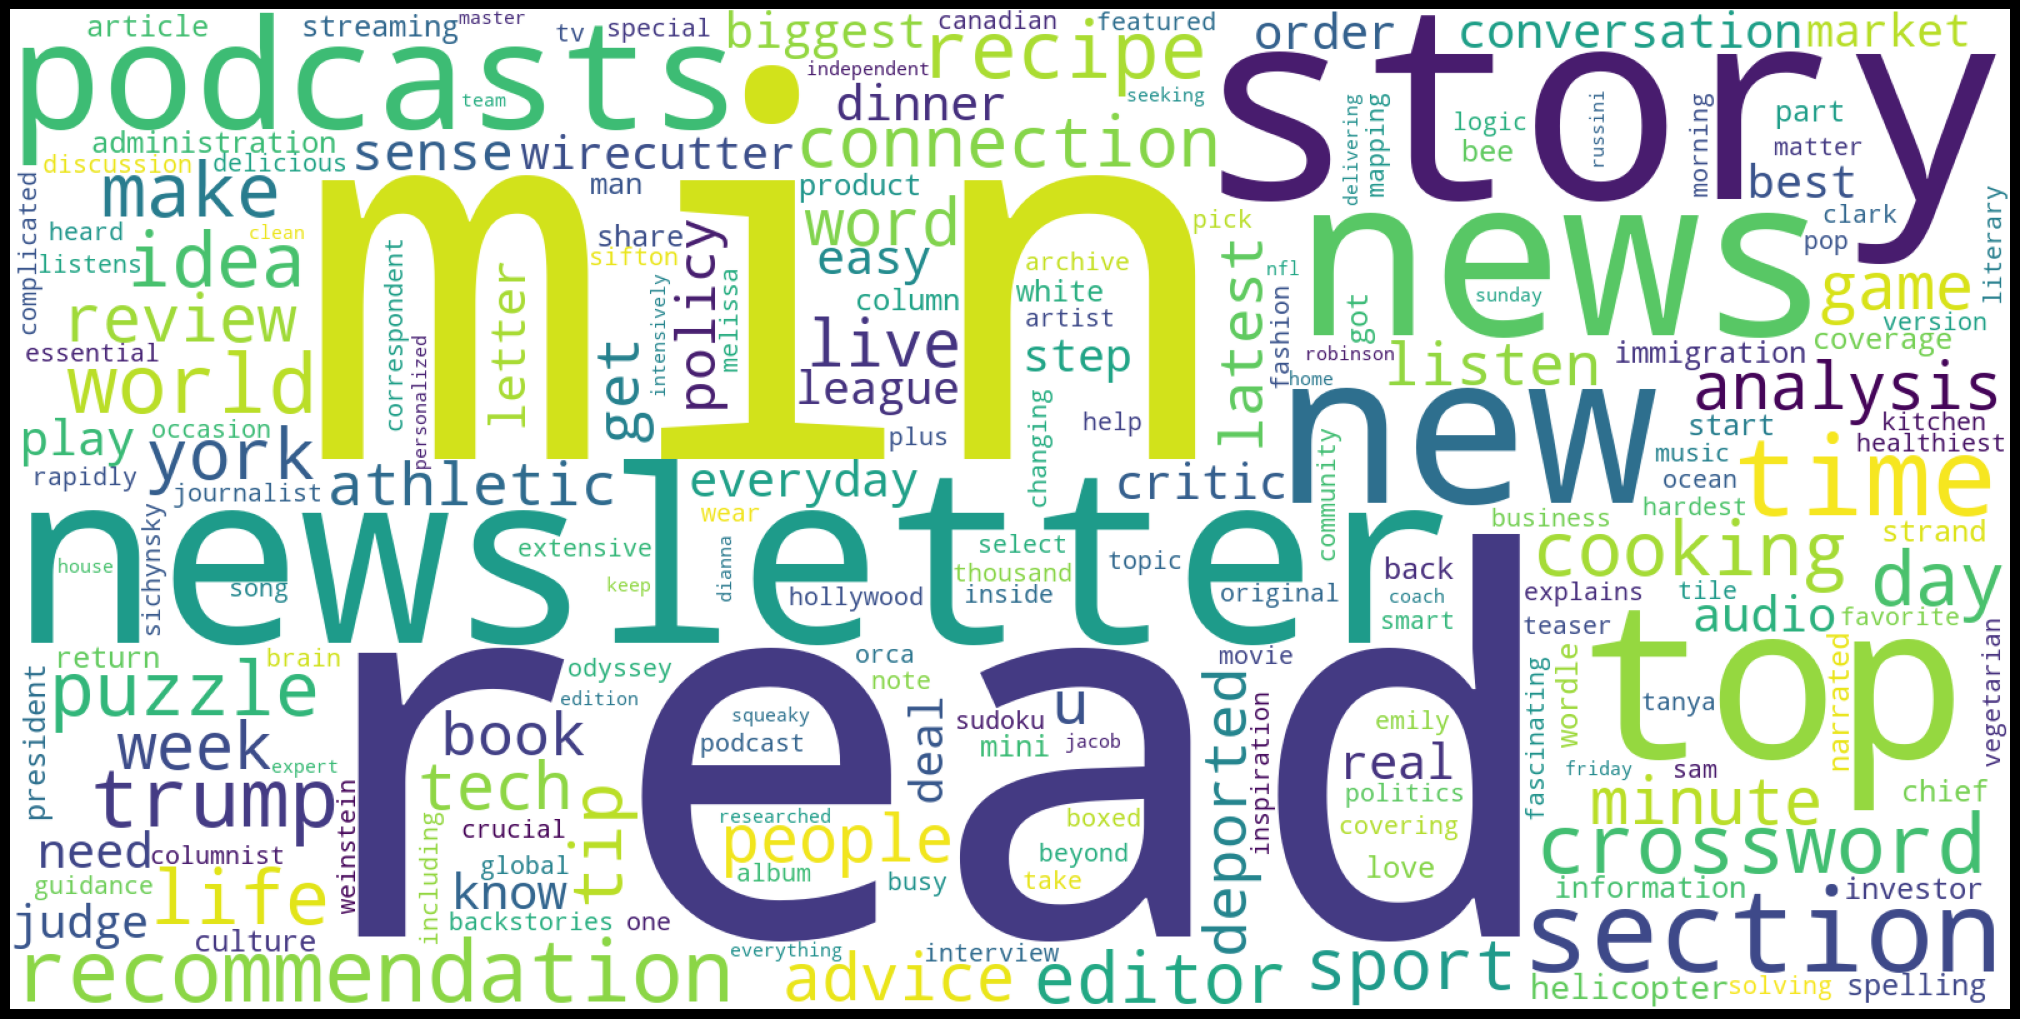

In [177]:
# Display the nyt wordcloud
make_word_cloud(nyt_text_lemmatized)

Hmmmm....

Let's add one final block of code to get rid of "min' and "read" -- refernces to the common phrase about how a story is a "5-min read." In fact, let's create an even longer exclusion set to focus more on the meaningful topics.

In [205]:
# First create an excluded set
custom_exclude = {
    # Layout / page structure
    'section', 'column', 'review', 'editor', 'article',

    # Vague modifiers
    'top', 'new', 'latest', 'real', 'best', 'biggest', 'everyday', 'original',

    # Generic verbs / CTA fluff
    'get', 'make', 'know', 'listen', 'share', 'start', 'take', 'watch',

    # Time references
    'day', 'week', 'minute', 'time', 'morning', 'friday', 'sunday',

    # Redundant format words
    'word', 'letter', 'audio', 'story', 'news',

    # Previously flagged
    'min', 'read', 'newsletter', 'recommendation'
}

# Now use list comprehension to remove those terms
nyt_text_cleaned = [w for w in nyt_text_lemmatized if w not in custom_exclude]
# Check the first 10 elements
nyt_text_cleaned[:10]

['sense',
 'idea',
 'analysis',
 'explains',
 'politics',
 'policy',
 'life',
 'podcasts',
 'need',
 'analysis']

And now, take two...

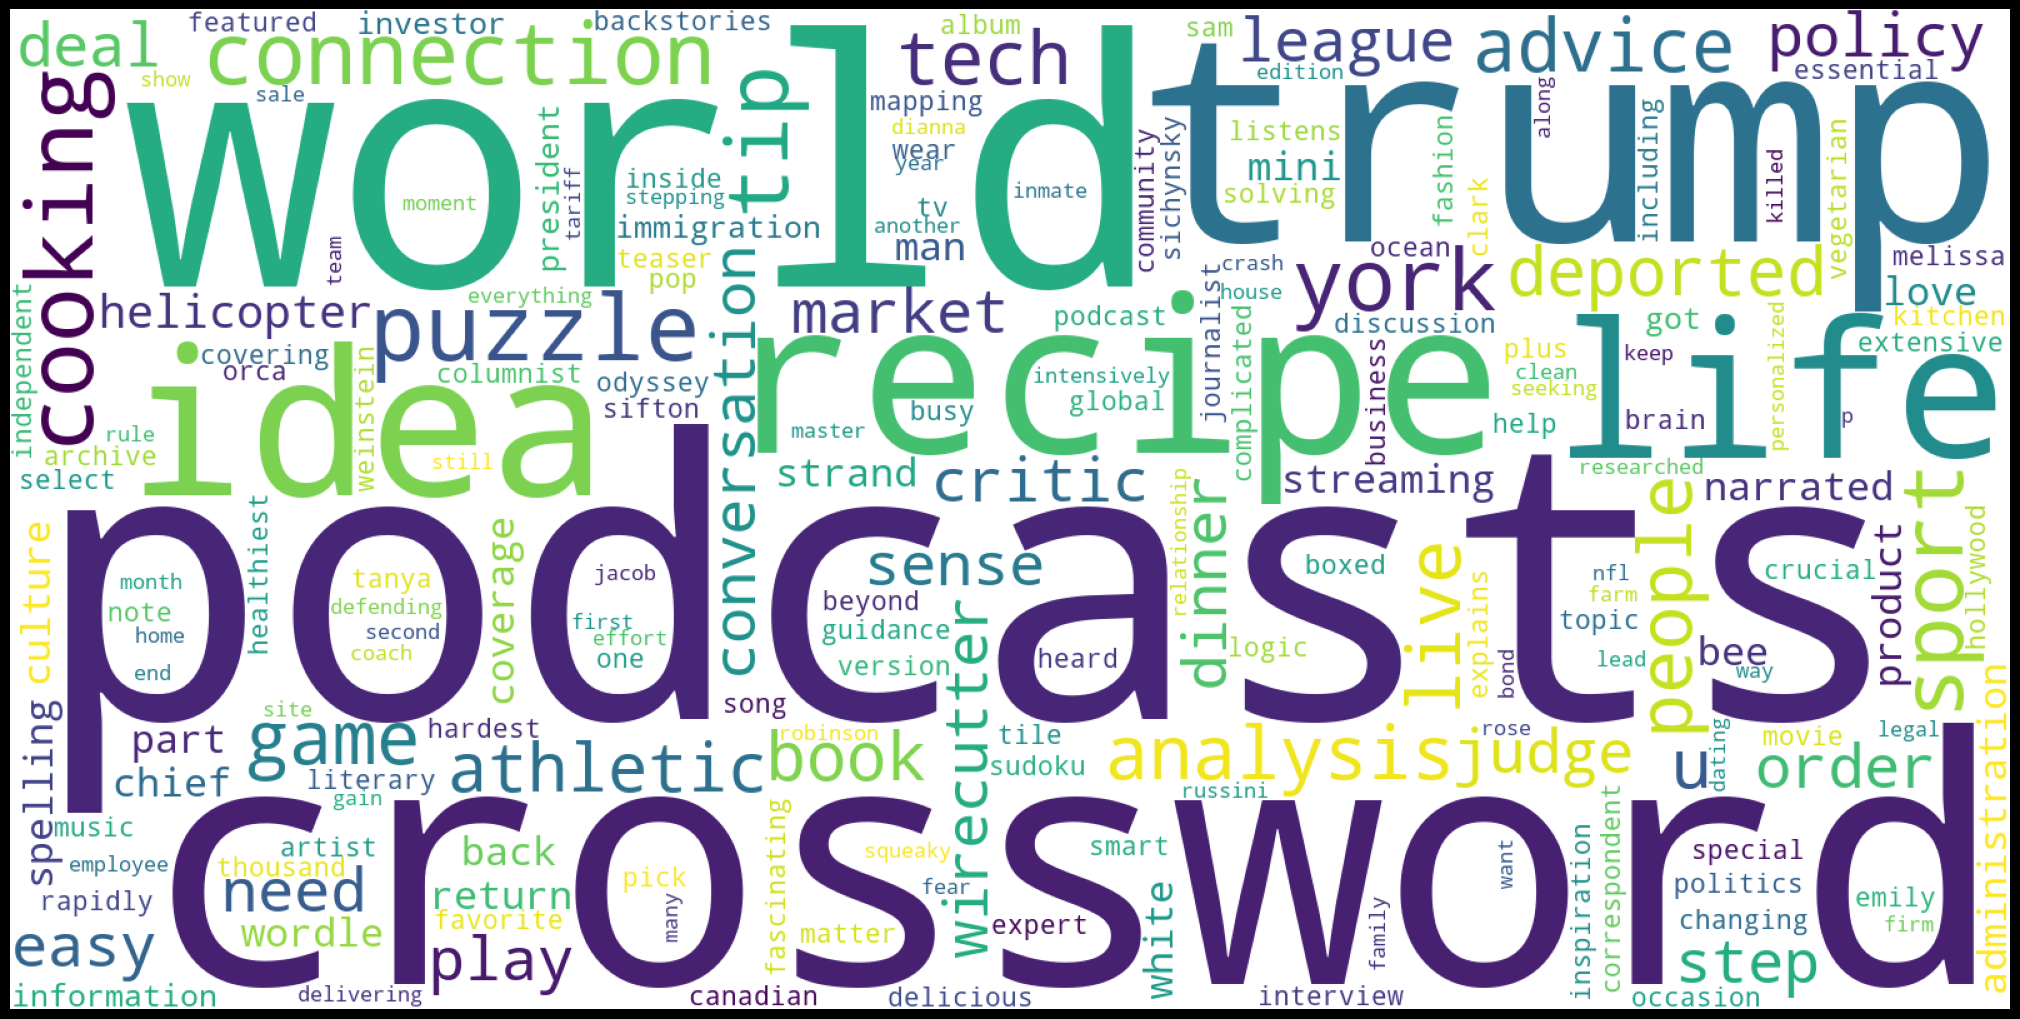

In [207]:
# And make the second word cloud
make_word_cloud(nyt_text_cleaned)

In [216]:
# Save the word cloud as a png
def save_word_cloud(word_list, filename="nyt_wordcloud.png"):
    wordc = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(FreqDist(word_list))
    wordc.to_file(filename)

In [218]:
# Run the function
save_word_cloud(nyt_text_cleaned)